In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
x_data = np.linspace(0.0,10,10000000)

In [14]:
my_noise = np.random.randn(len(x_data))

In [15]:
x_data

array([0.0000000e+00, 1.0000001e-06, 2.0000002e-06, ..., 9.9999980e+00,
       9.9999990e+00, 1.0000000e+01])

In [16]:
my_noise.shape

(10000000,)

In [17]:
# we are following the formula
# y=mx+b

y_true = (0.5 * x_data) * 5 + my_noise

In [18]:
x_df = pd.DataFrame(data=x_data, columns = ['Mohamed'])

In [19]:
y_df = pd.DataFrame(data=y_true, columns = ['Y'])

In [22]:
x_df.head()

,Mohamed
0,0.000000
1,0.000001
2,0.000002
3,0.000003
4,0.000004


In [23]:
y_df.head()

,Y
0,-0.190951
1,-0.816953
2,-0.687646
3,0.182837
4,-0.504521


In [27]:
 my_data = pd.concat([x_df, y_df] , axis= 1)

In [28]:
my_data

,Mohamed,Y
0,0.000000,-0.190951
1,0.000001,-0.816953
2,0.000002,-0.687646
3,0.000003,0.182837
4,0.000004,-0.504521
5,0.000005,0.127079
6,0.000006,-2.246535
7,0.000007,0.700528
8,0.000008,-0.760407
9,0.000009,0.492729


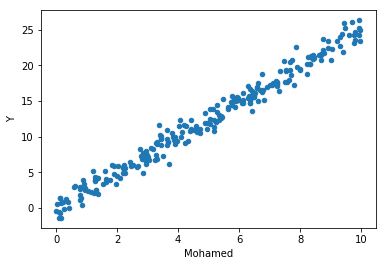

In [36]:
# here we plot a small sample of points

my_data.sample(n=250).plot(kind = 'scatter' , x= 'Mohamed', y='Y')

In [37]:
# we will feed our nn batches of data since a million points is too much

In [50]:
batch_size = 8

In [51]:
np.random.rand(2)

array([0.01756914, 0.76462436])

In [73]:
m = tf.Variable(17)
b = tf.Variable(74.8)

In [74]:
# now we do placeholder
# size of placeholder is the batch size
xph = tf.placeholder(tf.float32, [batch_size])

yph = tf.placeholder(tf.float32, [batch_size])

In [75]:
# y = mx+b
y_model = m * xph + b

ValueError: Tensor conversion requested dtype int32 for Tensor with dtype float32: 'Tensor("Placeholder_5:0", shape=(8,), dtype=float32)'

In [76]:
# lost function
error= tf.reduce_sum(tf.square(yph - y_model))

In [77]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [78]:
init = tf.global_variables_initializer()


In [79]:

with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 100
    
    for i in range(batches):
        
        rand_in = np.random.randint(len(x_data), size=batch_size)
        
        feed = { xph:x_data[rand_in], yph: y_true[rand_in] }
        
        sess.run(train, feed_dict = feed)
        
        model_m , model_b = sess.run([m,b])

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_3' with dtype float and shape [8]
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=[8], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_3', defined at:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/anaconda3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-53-684965468b56>", line 3, in <module>
    xph = tf.placeholder(tf.float32, [batch_size])
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_3' with dtype float and shape [8]
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=[8], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [80]:
model_m

-3.455202

In [81]:
model_b

40.530968

In [82]:
y_hat = model_m * x_data + model_m

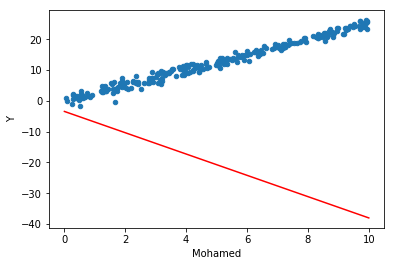

In [83]:
my_data.sample(250).plot(kind = 'scatter', x = "Mohamed" , y="Y")
plt.plot(x_data,y_hat,'r')